# Task 1: Users Overview Analysis

In [40]:
import os
import sys

# path of the module files
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from utils import *
from load_db import load_data_from_postgres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [41]:
# Define your SQL query
query = "SELECT * FROM xdr_data"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


Successfully loaded the data


In [42]:
# describing the dataframe
print(df.shape)
df.head(3)

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0


In [43]:
# information on the dateframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

> It can be seen from the above there are attributes with null values.

## Overview

In [44]:
# top 3 handsets
df.groupby('Handset Manufacturer')['MSISDN/Number'].count().sort_values(ascending=False).head(3)

Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: MSISDN/Number, dtype: int64

In [45]:
# top 10 handsets
df.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False).head(11)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Samsung Galaxy A5 Sm-A520F       3708
Name: MSISDN/Number, dtype: int64

In [46]:
# the top 5 handsets per top 3 handset manufacturer
top_3 = df.groupby('Handset Manufacturer')['MSISDN/Number'].count().sort_values(ascending=False).head(3)
df_top_manufacturers  = df[df['Handset Manufacturer'].isin(top_3.index)]
df_top_manufacturers.groupby('Handset Manufacturer').apply(lambda x:x.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False).head(5))

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9413
                      Apple iPhone 6 (A1586)             9012
                      Apple iPhone 7 (A1778)             6304
                      Apple iPhone Se (A1723)            5176
                      Apple iPhone 8 (A1905)             4985
Huawei                Huawei B528S-23A                  19727
                      Huawei E5180                       2074
                      Huawei P20 Lite Huawei Nova 3E     2018
                      Huawei P20                         1479
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4480
                      Samsung Galaxy A5 Sm-A520F         3708
                      Samsung Galaxy J5 (Sm-J530)        3682
                      Samsung Galaxy J3 (Sm-J330)        3464
                      Samsung Galaxy S7 (Sm-G930X)       3176
Name: MSISDN/Numb

- Apple, Samsung and Huawei are the top three handset manufacturers the customer uses.

- It can be seen that Apple's top five handset types are in the top ten handset type used by the customers.

- Two of samsung model's are in the top ten while Huawei only has one though this model Huawei B528S-23A is the top one of the types used.

- There are 8931 customers which the telecom doesn't know what type handset type they use.

Suggestion for marketing team:

- Do campaign on specific manufacturer users.

- Focus working on the retention of customers from less used manufactuer types to increase diversity.

## Task 1.1

In [47]:
# Extracting main features for the analysis
main_columns = df[['MSISDN/Number','Dur. (ms)','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)']].copy()
main_columns['number_of_session'] = 1   # to get the number of sessions of each users

main_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            148935 non-null  float64
 1   Dur. (ms)                150000 non-null  float64
 2   Social Media DL (Bytes)  150001 non-null  float64
 3   Social Media UL (Bytes)  150001 non-null  float64
 4   Youtube DL (Bytes)       150001 non-null  float64
 5   Youtube UL (Bytes)       150001 non-null  float64
 6   Netflix DL (Bytes)       150001 non-null  float64
 7   Netflix UL (Bytes)       150001 non-null  float64
 8   Google DL (Bytes)        150001 non-null  float64
 9   Google UL (Bytes)        150001 non-null  float64
 10  Email DL (Bytes)         150001 non-null  float64
 11  Email UL (Bytes)         150001 non-null  float64
 12  Gaming DL (Bytes)        150001 non-null  float64
 13  Gaming UL (Bytes)        150001 non-null  float64
 14  Othe

In [48]:
# check for missing values
missing_values_table(main_columns)

Your selected dataframe has 19 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values,Dtype
MSISDN/Number,1066,0.7,float64
Dur. (ms),1,0.0,float64
Total UL (Bytes),1,0.0,float64
Total DL (Bytes),1,0.0,float64


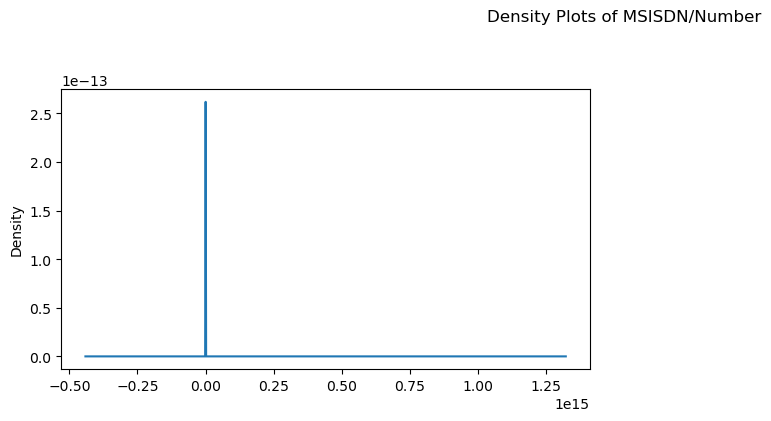

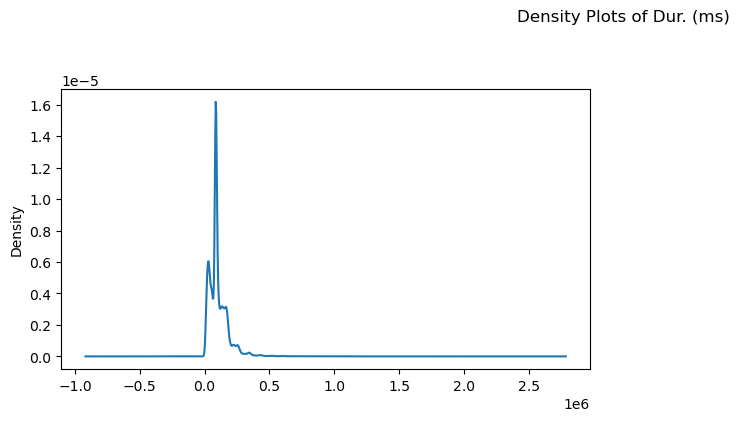

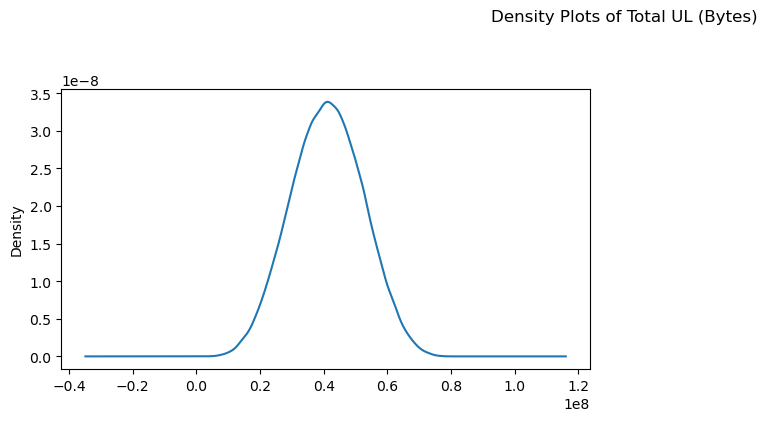

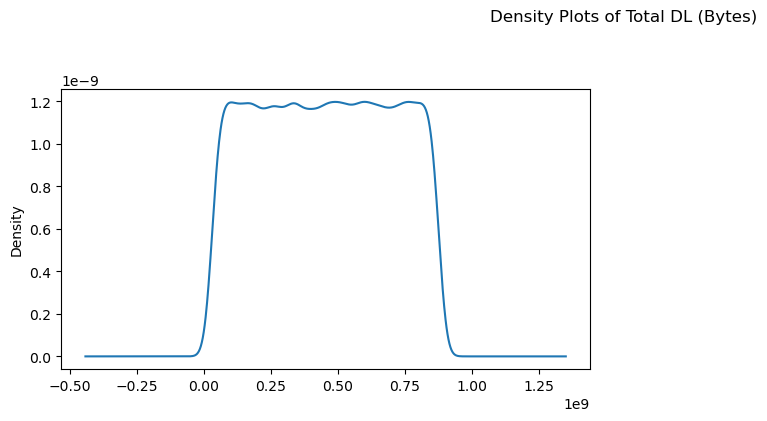

In [49]:
# check the distribution of columns containing null values
null_column = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)','Total DL (Bytes)']

for col in null_column:
    density_plot(main_columns,col)

> From the above graph MSISDN/Number and Dur. (ms) are skewed while Total UL (Bytes) and Total DL (Bytes) tend to have a normal distribution. As a result null values in MSISDN/Number and Dur. (ms) can be filled by median and in Total UL (Bytes) and Total DL (Bytes) mean can be used.

In [50]:
# fill nan value with mean for normal distribution (Total UL and Total Dl)
normal_distribution = ['Total UL (Bytes)','Total DL (Bytes)']
skewed_distribution = ['MSISDN/Number','Dur. (ms)']

for nor in normal_distribution:
    fill_mean(main_columns,nor)
    
for sk in skewed_distribution:
    fill_median(main_columns,sk)

### Check

In [51]:
# check for missing values
missing_values_table(main_columns)

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [52]:
# check for outlier
main_columns.describe()

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),number_of_session
count,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.0
mean,4.182441e+10,1.046084e+05,1.795322e+06,32928.434380,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,1.0
std,2.438731e+12,8.103736e+04,1.035482e+06,19006.178256,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,0.0
min,3.360100e+10,7.142000e+03,1.200000e+01,0.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,1.0
25%,3.365151e+10,5.744200e+04,8.991480e+05,16448.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,1.0
50%,3.366371e+10,8.639900e+04,1.794369e+06,32920.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,1.0
75%,3.368307e+10,1.324300e+05,2.694938e+06,49334.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08,1.0
max,8.823971e+14,1.859336e+06,3.586064e+06,65870.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1.0


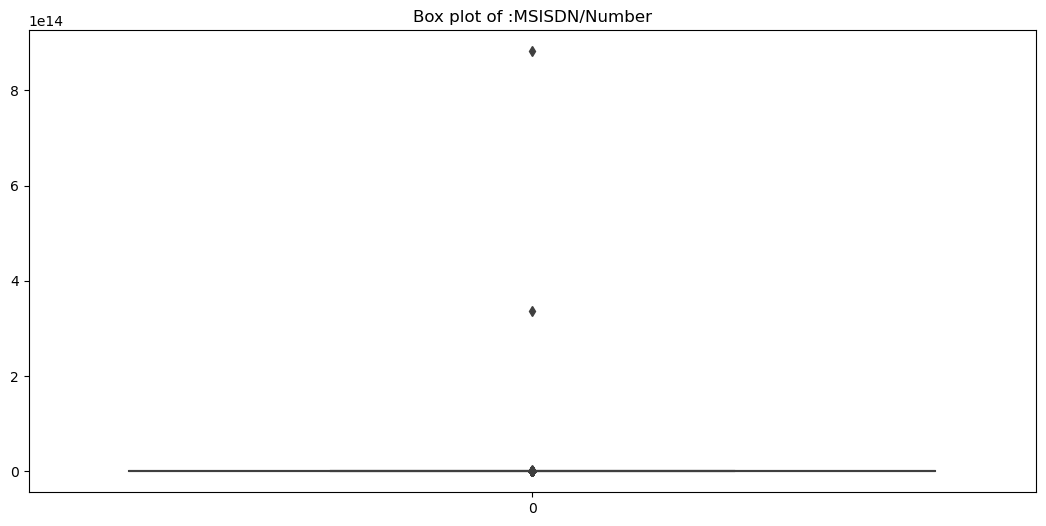

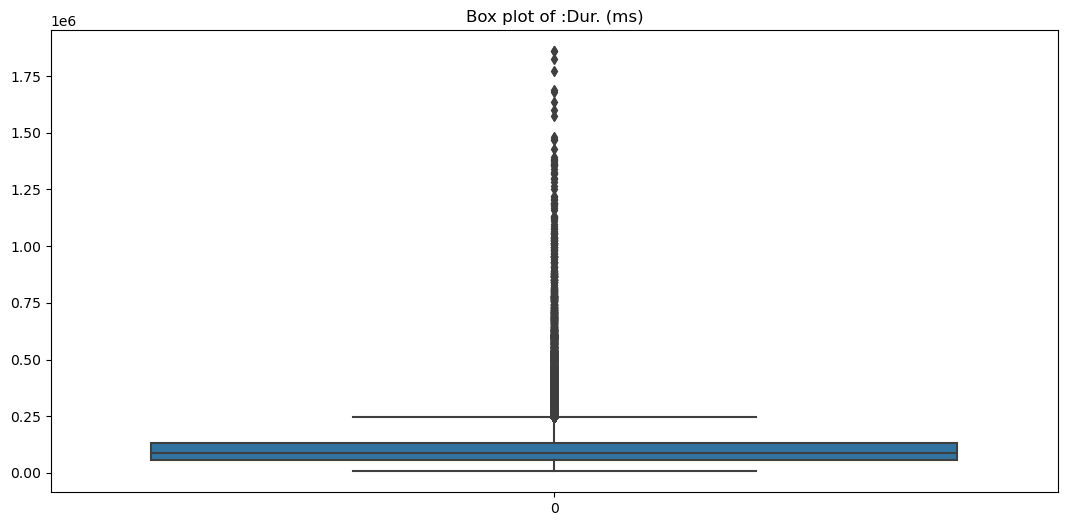

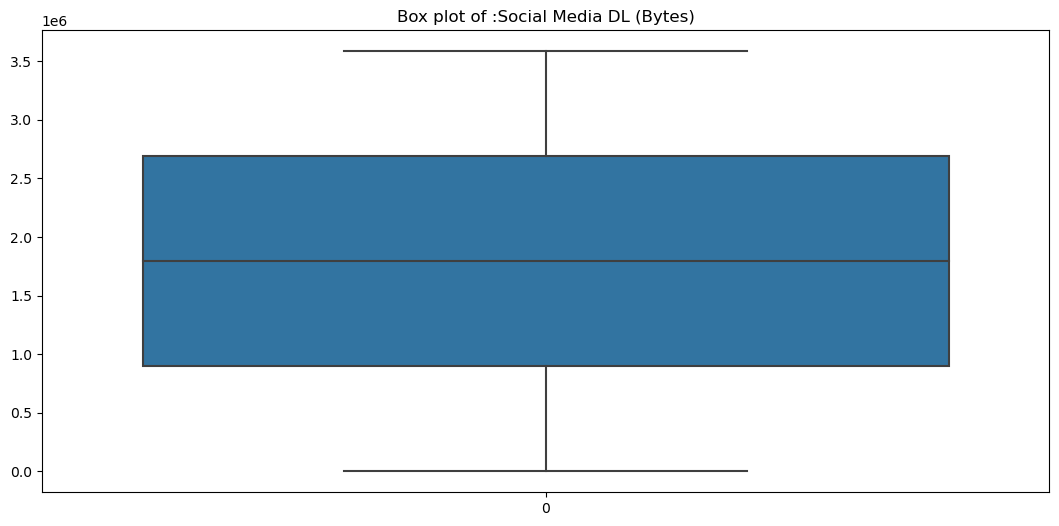

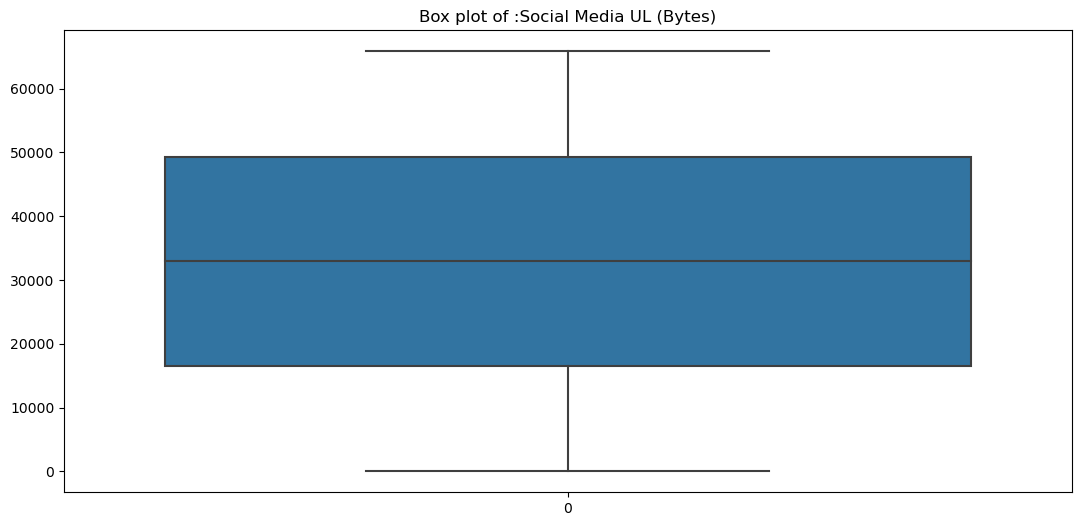

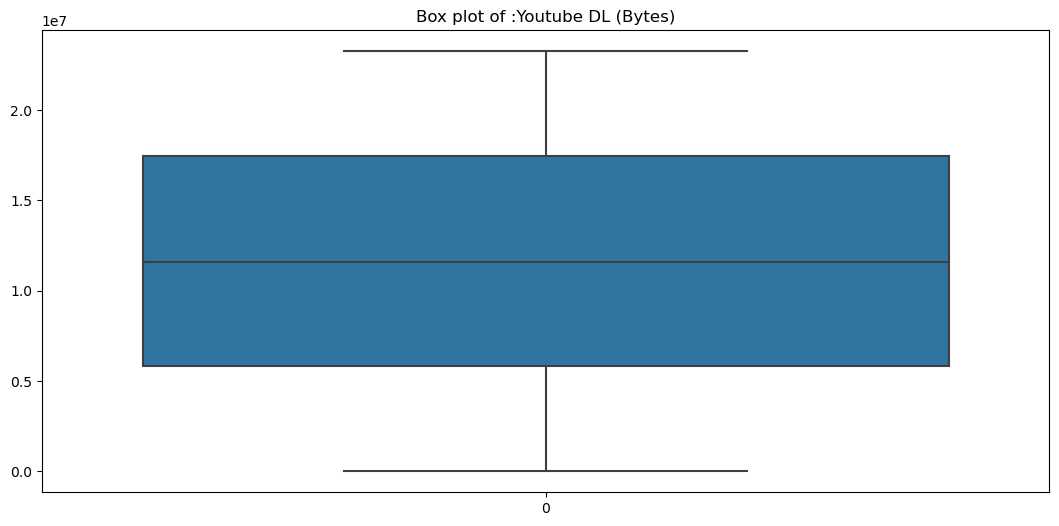

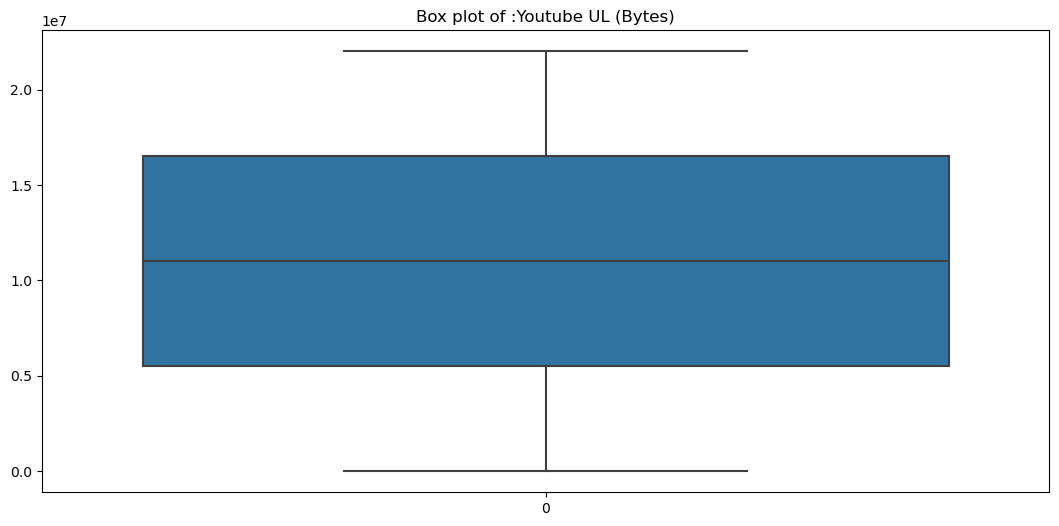

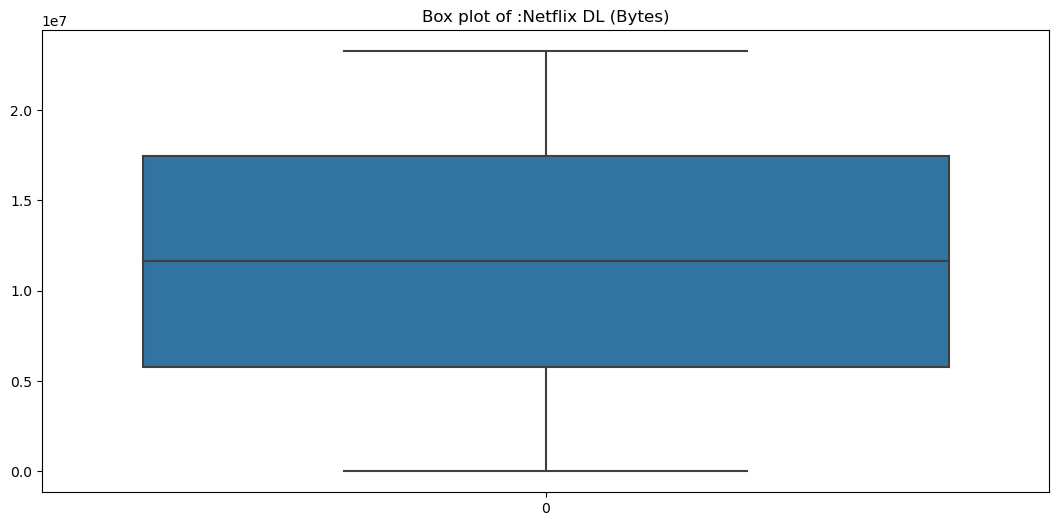

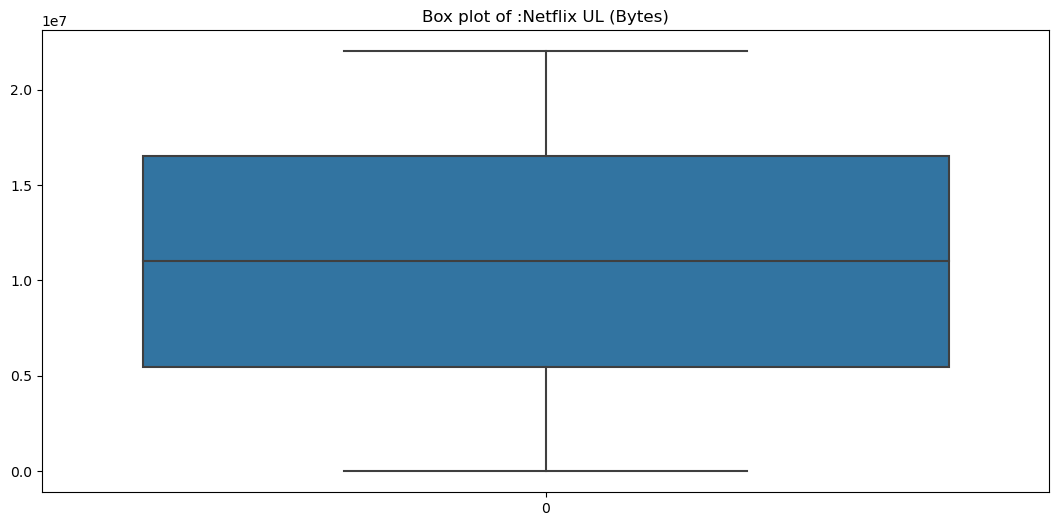

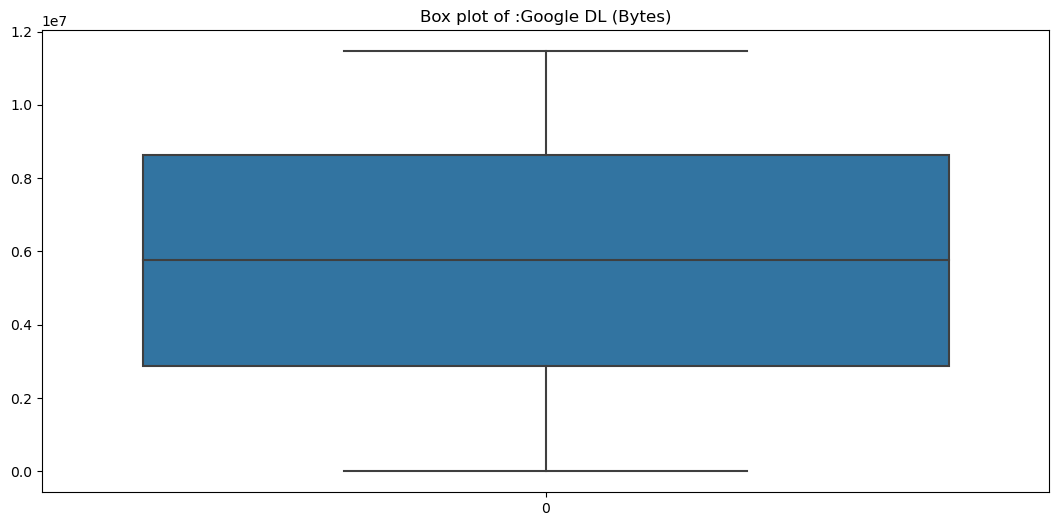

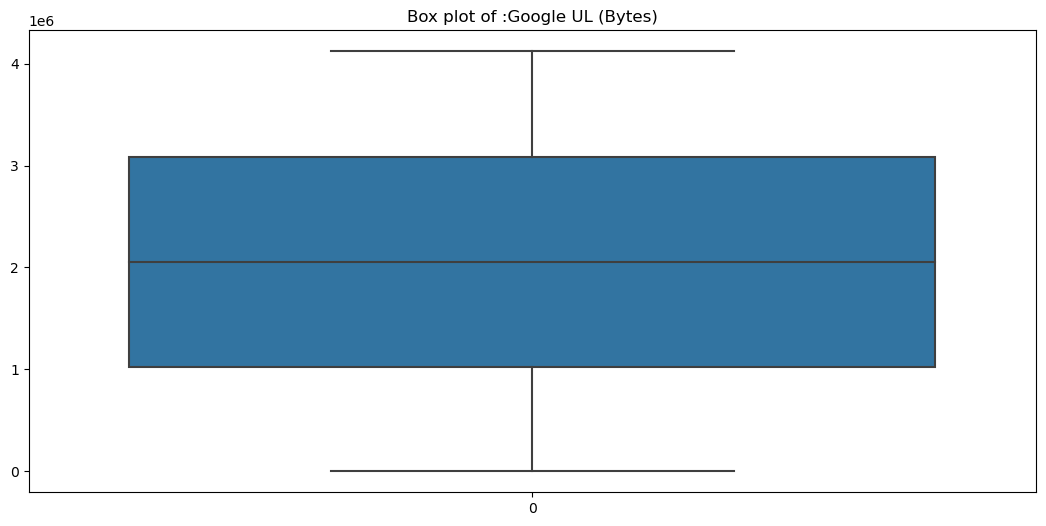

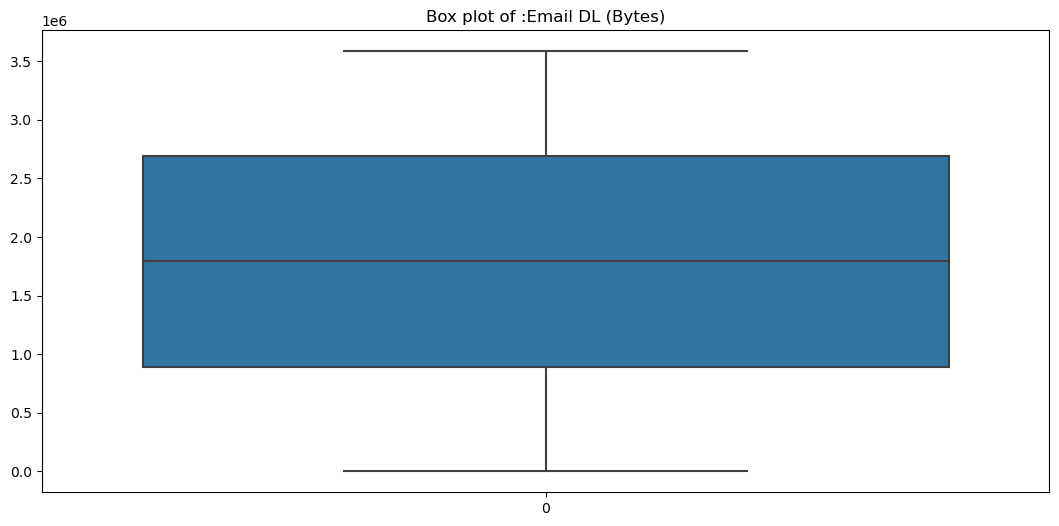

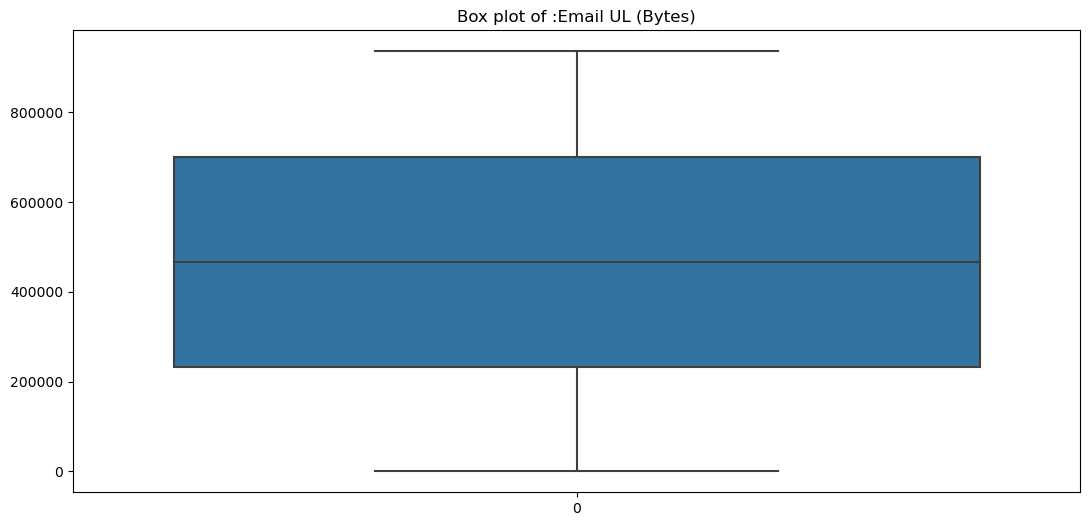

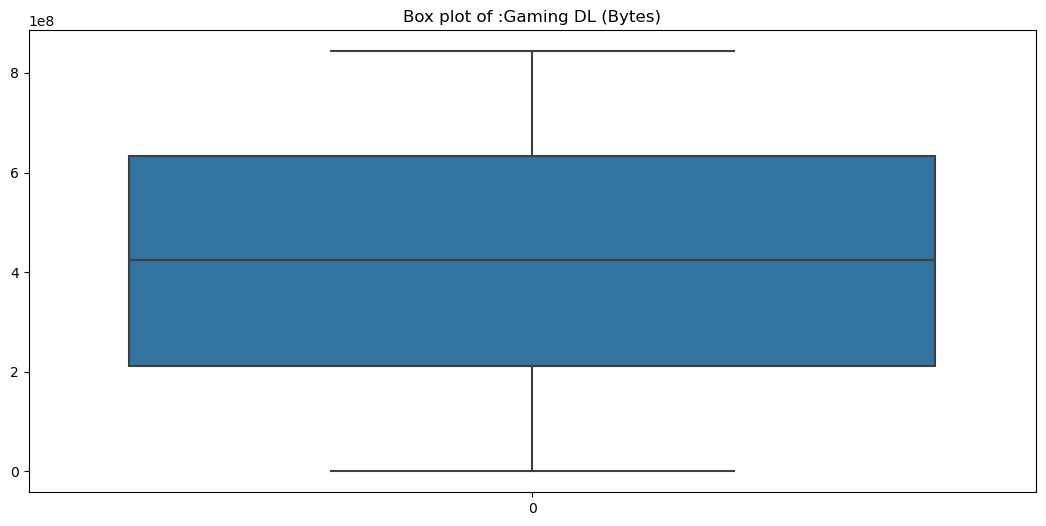

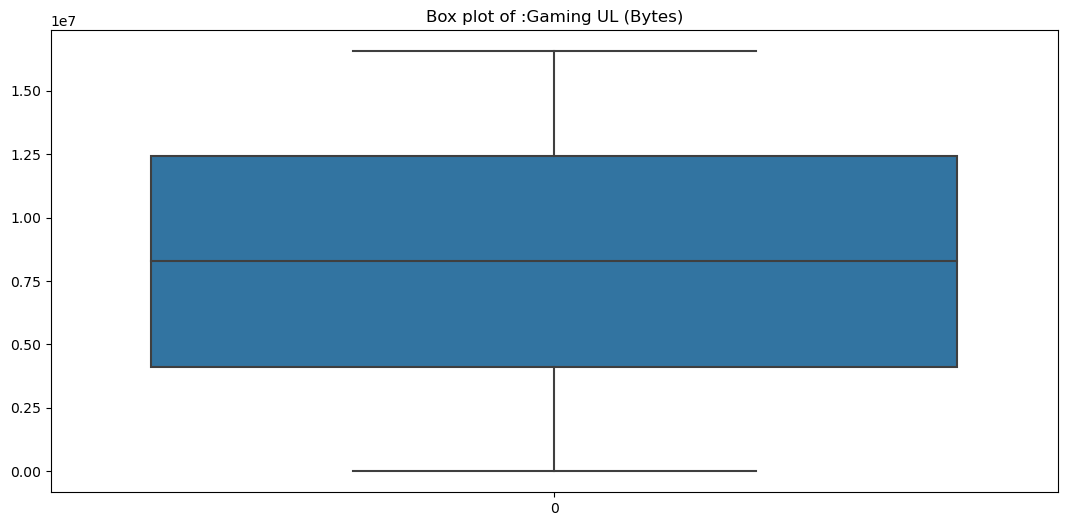

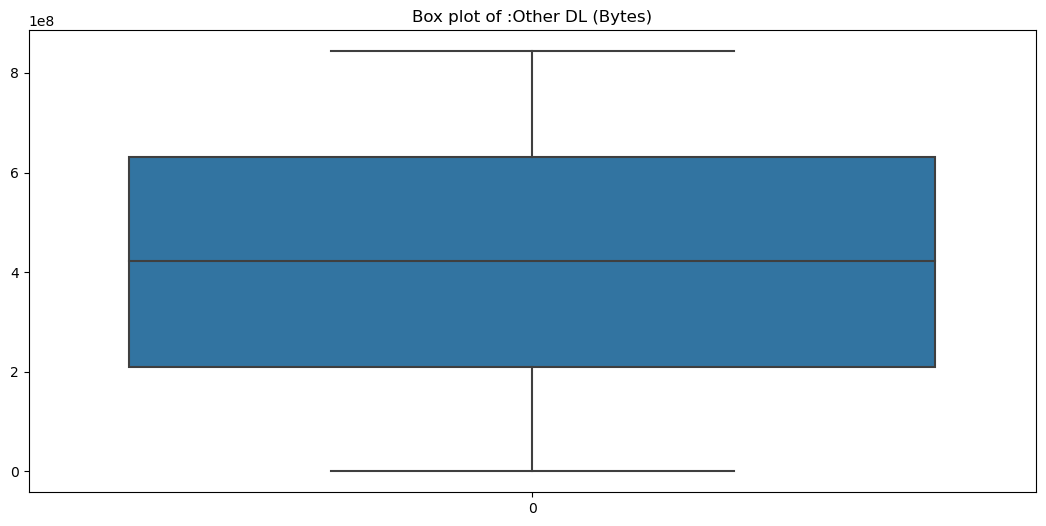

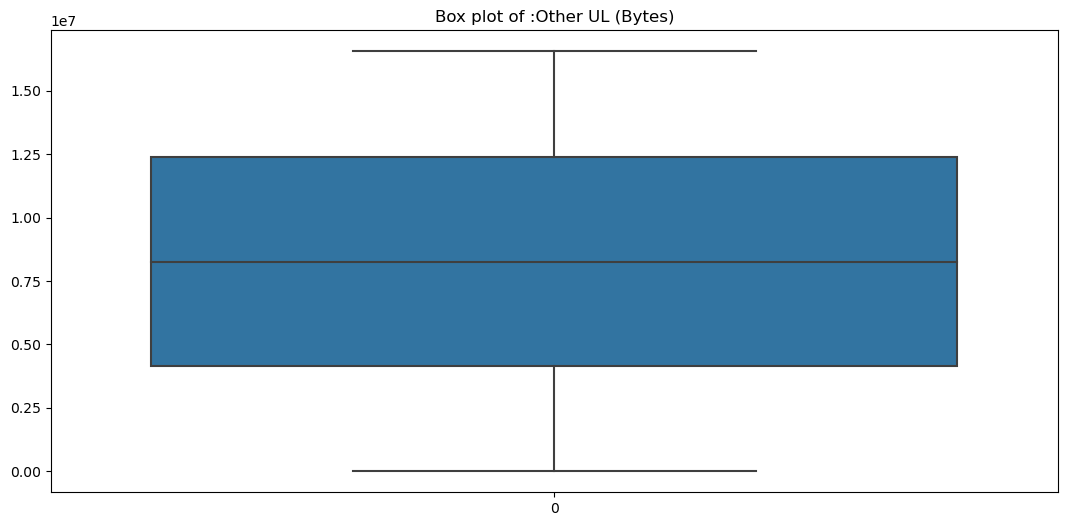

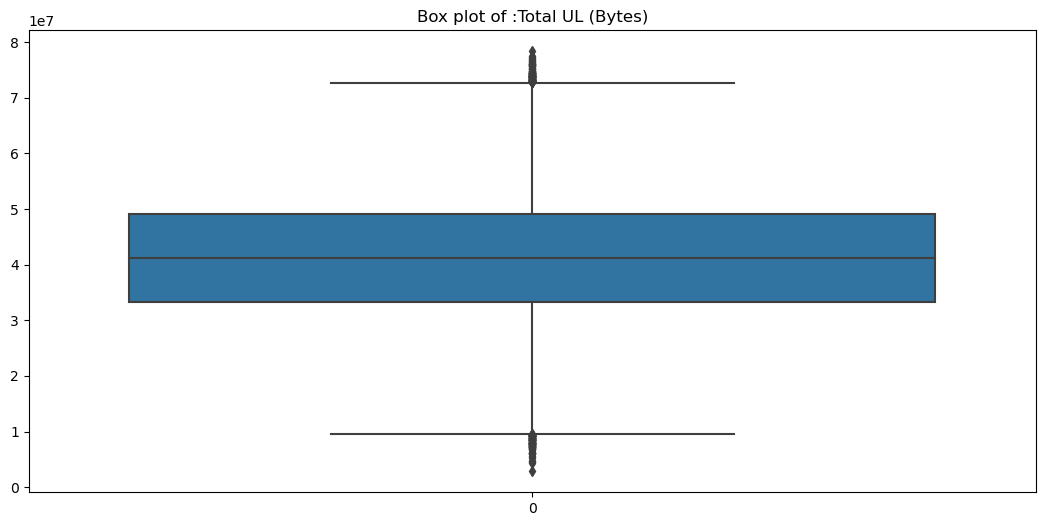

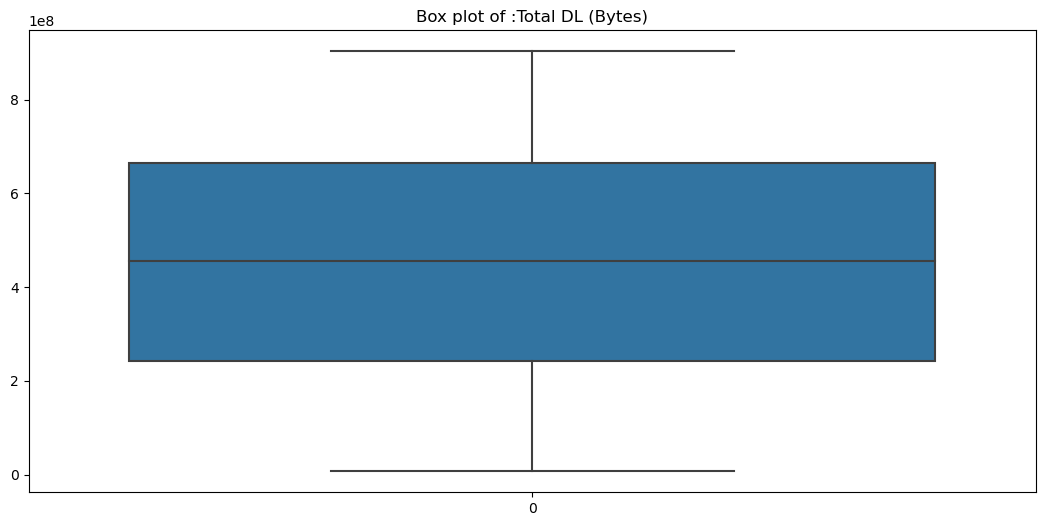

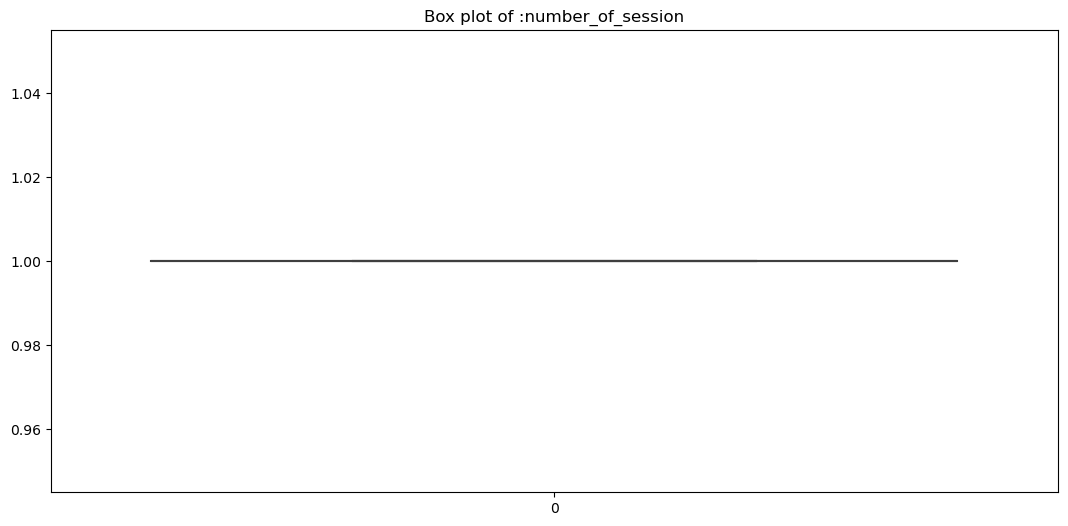

In [53]:
# using box plot to see the outliers of columns
columns = main_columns.columns
for col in columns:
    box_plot(main_columns,col)

> It can be seen MSISDN/Number and Total UL (Bytes) do have outliers.

Unique length of the mobiles: [13  3 15 17]


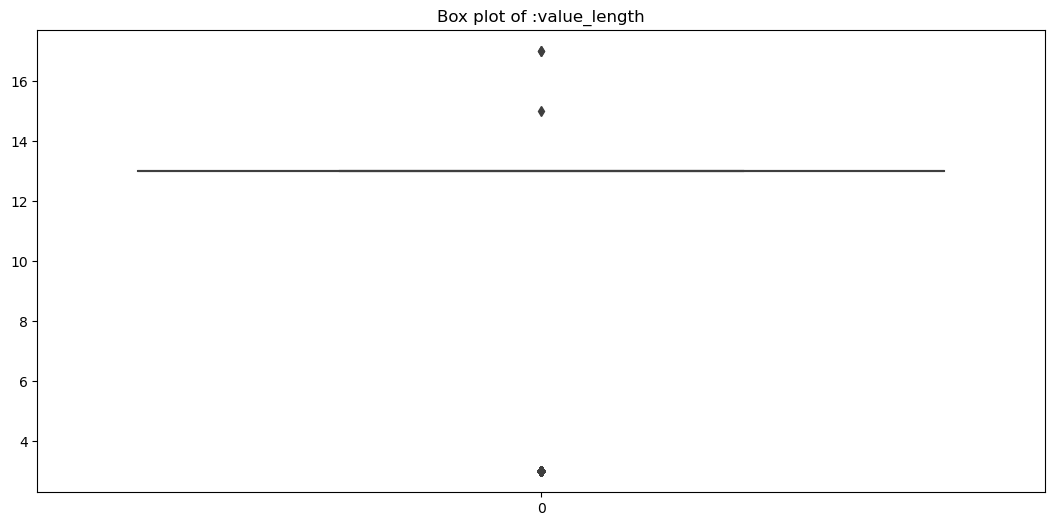

In [54]:
# checking the length of each customer number to search for outliers
main_columns['value_length'] = df['MSISDN/Number'].apply(lambda x: len(str(x)))            # length of the custmer number
print(f"Unique length of the mobiles: {main_columns['value_length'].unique()}")             # to see how many length of customer mobite number

# graph the distribution
box_plot(main_columns,'value_length')

In [55]:
# remove outliers using the customer mobile length
main_columns = remove_outliers(main_columns,'value_length')
main_columns.shape

(148933, 20)

### Check

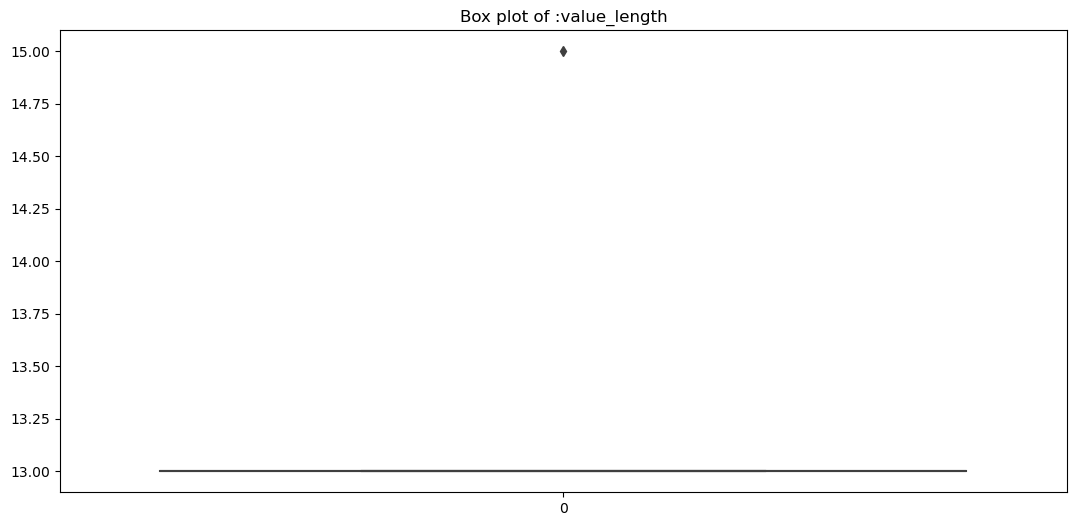

value_length
13    148932
15         1
Name: count, dtype: int64
value_length
13    148932
Name: count, dtype: int64


In [56]:
# graph the distribution
box_plot(main_columns,'value_length')

# count the unique values the remove the outlier if its small count
print(main_columns['value_length'].value_counts())
main_columns = main_columns[main_columns['value_length'] != 15]

# recheck
print(main_columns['value_length'].value_counts())       # after removing the one outlier

In [57]:
# remove outliers using from Total UL (Bytes) column
main_columns = remove_outliers(main_columns,'Total UL (Bytes)')

### Check

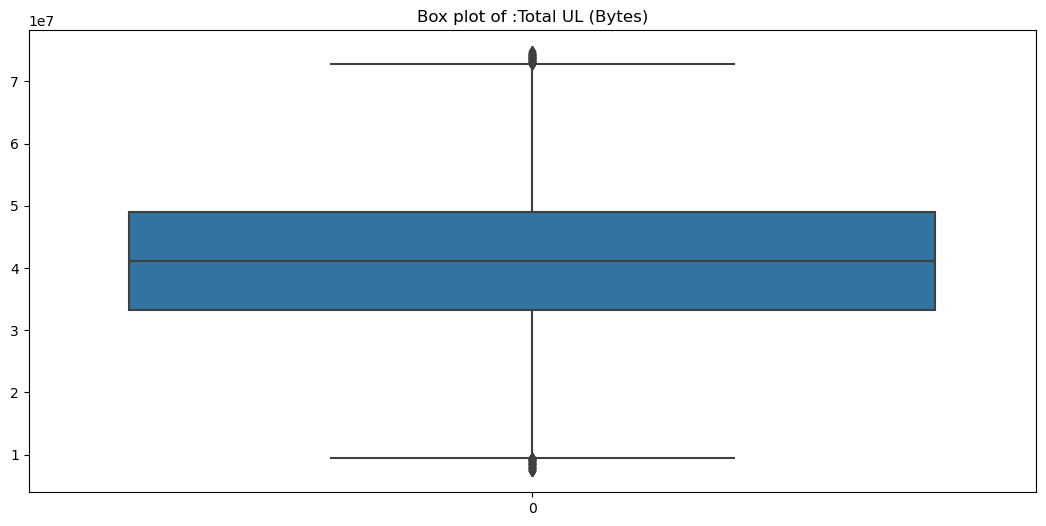

In [58]:
box_plot(main_columns,'Total UL (Bytes)')

> The number of outliers have decreased.

In [59]:
# adding the total volume column and droping value length to prepare for the aggregated dataframe
main_columns['Total Volume'] =  main_columns['Total UL (Bytes)'] + main_columns['Total DL (Bytes)'] 
main_columns.drop('value_length', axis = 1,inplace = True)

In [60]:
# aggregate the dataframe by users
main_columns['MSISDN/Number'] = main_columns['MSISDN/Number'].astype(str)    # to see if it aggregate on distinct customers properly
user_behavior = main_columns.groupby('MSISDN/Number').sum().reset_index()
user_behavior.head()

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),number_of_session,Total Volume
0,33601001722.0,116720.0,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08,1,8.786906e+08
1,33601001754.0,181230.0,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08,1,1.568596e+08
2,33601002511.0,134969.0,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08,1,5.959665e+08
3,33601007832.0,49878.0,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08,1,4.223207e+08
4,33601008617.0,37104.0,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09,2,1.457411e+09


## Task 1.2

In [61]:
# Describe all relevant variables and associated data types
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106822 entries, 0 to 106821
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            106822 non-null  object 
 1   Dur. (ms)                106822 non-null  float64
 2   Social Media DL (Bytes)  106822 non-null  float64
 3   Social Media UL (Bytes)  106822 non-null  float64
 4   Youtube DL (Bytes)       106822 non-null  float64
 5   Youtube UL (Bytes)       106822 non-null  float64
 6   Netflix DL (Bytes)       106822 non-null  float64
 7   Netflix UL (Bytes)       106822 non-null  float64
 8   Google DL (Bytes)        106822 non-null  float64
 9   Google UL (Bytes)        106822 non-null  float64
 10  Email DL (Bytes)         106822 non-null  float64
 11  Email UL (Bytes)         106822 non-null  float64
 12  Gaming DL (Bytes)        106822 non-null  float64
 13  Gaming UL (Bytes)        106822 non-null  float64
 14  Othe

In [62]:
# segement customers into deciles
user_behavior['decile_class'] = pd.qcut(user_behavior['Dur. (ms)'], 10, labels = False) + 1
user_behavior.head()

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),number_of_session,Total Volume,decile_class
0,33601001722.0,116720.0,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,3337123.0,1051882.0,...,493962.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08,1,8.786906e+08,6
1,33601001754.0,181230.0,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,4197697.0,1137166.0,...,478960.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08,1,1.568596e+08,8
2,33601002511.0,134969.0,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,3343483.0,99643.0,...,768880.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08,1,5.959665e+08,7
3,33601007832.0,49878.0,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,5937765.0,3740728.0,...,106052.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08,1,4.223207e+08,2
4,33601008617.0,37104.0,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,13728668.0,4770948.0,...,1057661.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09,2,1.457411e+09,2


In [63]:
# compute total duration per decile
user_behavior['Dur. (min)'] = user_behavior['Dur. (ms)'].apply(lambda x: ms_to_mintue(x))
user_behavior.groupby('decile_class')['Dur. (ms)'].sum().sort_values(ascending = False).head(5) # in seconds

decile_class
10    5.103765e+09
9     2.485398e+09
8     1.868492e+09
7     1.578284e+09
6     1.254339e+09
Name: Dur. (ms), dtype: float64

In [64]:
# number of custmers per decile
user_behavior.groupby('decile_class')['MSISDN/Number'].count().sort_values(ascending = False)

decile_class
4     12077
3     10751
1     10683
6     10683
10    10683
2     10682
8     10682
9     10682
7     10681
5      9218
Name: MSISDN/Number, dtype: int64

- It can be see that the top 5 decile class based on duration have almost equal number of users.

- The top three number of users based on decile class indicates that most of the customers session duration is in the lowest range. 

In [65]:
# calculate basic metric 
metric_of_attributes(user_behavior)

,Application,Maximum,Minimum,Mean,Median,Above_Mean_Users,Below_Mean_Users
0,Dur. (ms),1.855375e+07,7.142000e+03,1.461402e+05,1.027150e+05,37884,68938
1,Social Media DL (Bytes),4.274384e+07,1.200000e+01,2.501946e+06,2.264784e+06,47267,59555
2,Social Media UL (Bytes),6.309420e+05,0.000000e+00,4.588249e+04,4.155650e+04,47324,59498
3,Youtube DL (Bytes),2.378830e+08,5.300000e+01,1.621349e+07,1.460348e+07,46974,59848
4,Youtube UL (Bytes),2.150757e+08,1.060000e+02,1.534260e+07,1.386522e+07,47252,59570
5,Netflix DL (Bytes),1.994792e+08,4.200000e+01,1.620558e+07,1.463888e+07,47161,59661
6,Netflix UL (Bytes),2.032419e+08,3.500000e+01,1.533063e+07,1.387707e+07,47178,59644
7,Google DL (Bytes),1.161065e+08,2.070000e+02,8.015837e+06,7.256326e+06,47314,59508
8,Google UL (Bytes),3.608540e+07,3.000000e+00,2.865678e+06,2.593109e+06,47297,59525
9,Email DL (Bytes),3.360721e+07,9.700000e+01,2.497150e+06,2.266154e+06,47209,59613


In [66]:
# univariate behavior using not-graphic method
dispersion_of_attributes(user_behavior)

,Application,Range,Varience,IQR,Standard dev
0,Dur. (ms),1.854661e+07,3.472524e+10,1.015272e+05,1.863471e+05
1,Social Media DL (Bytes),4.274382e+07,3.562805e+12,2.091336e+06,1.887540e+06
2,Social Media UL (Bytes),6.309420e+05,1.205195e+09,3.832125e+04,3.471591e+04
3,Youtube DL (Bytes),2.378830e+08,1.518666e+14,1.348338e+07,1.232342e+07
4,Youtube UL (Bytes),2.150756e+08,1.344695e+14,1.272486e+07,1.159610e+07
5,Netflix DL (Bytes),1.994792e+08,1.516965e+14,1.354012e+07,1.231651e+07
6,Netflix UL (Bytes),2.032418e+08,1.347397e+14,1.279934e+07,1.160774e+07
7,Google DL (Bytes),1.161062e+08,3.677858e+13,6.627636e+06,6.064535e+06
8,Google UL (Bytes),3.608539e+07,4.719945e+12,2.402260e+06,2.172543e+06
9,Email DL (Bytes),3.360711e+07,3.598490e+12,2.065920e+06,1.896969e+06


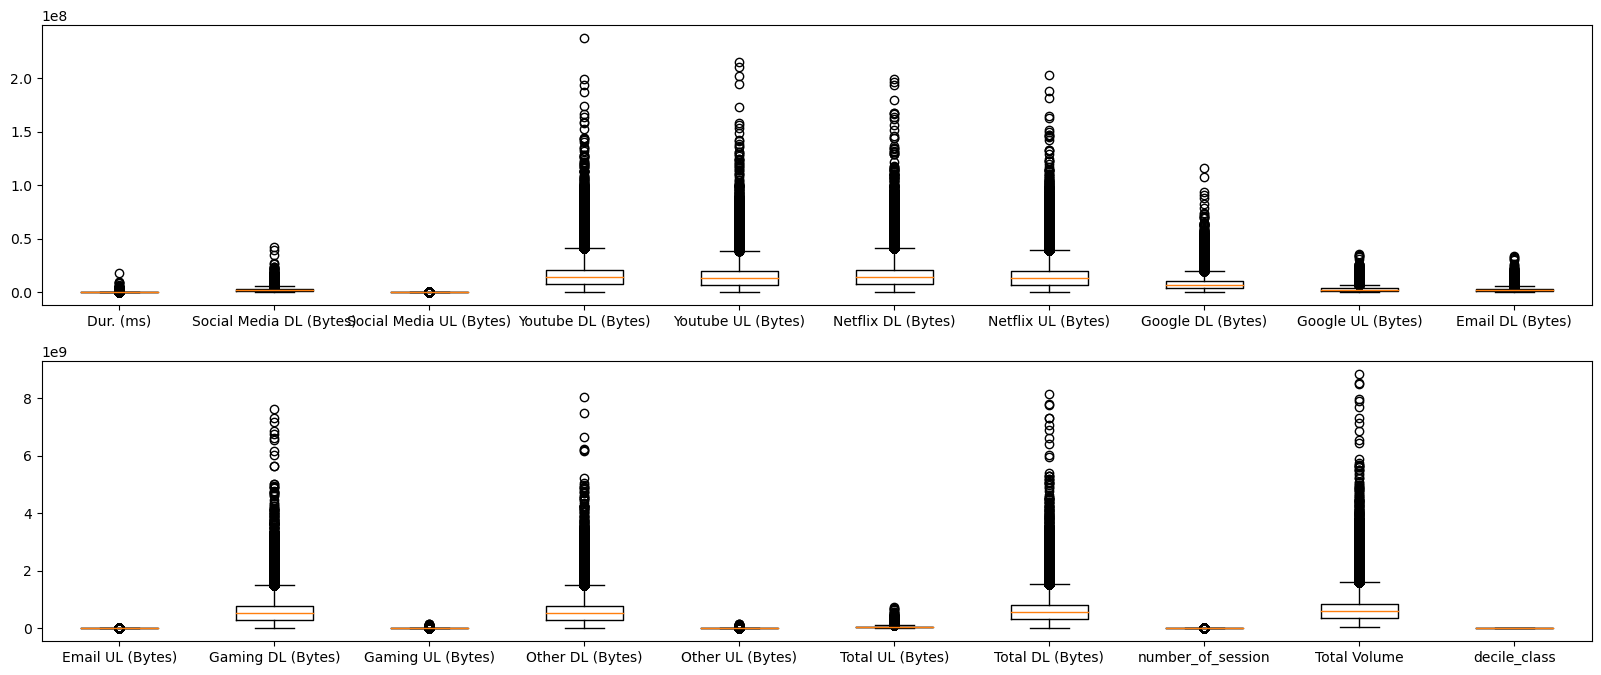

In [67]:
# graphical univariate analysis
graphical_univariate(user_behavior)

> The boxplot shows their is a high number of outliers in most of the features thus the above basic metric and dispersion have been afffect by these numbers.

In [68]:
# fix outliers 
numerical_columns = user_behavior.select_dtypes(include=np.number).columns

for num_col in numerical_columns:
    user_behavior[num_col] = fix_outlier(user_behavior,num_col)

### Check

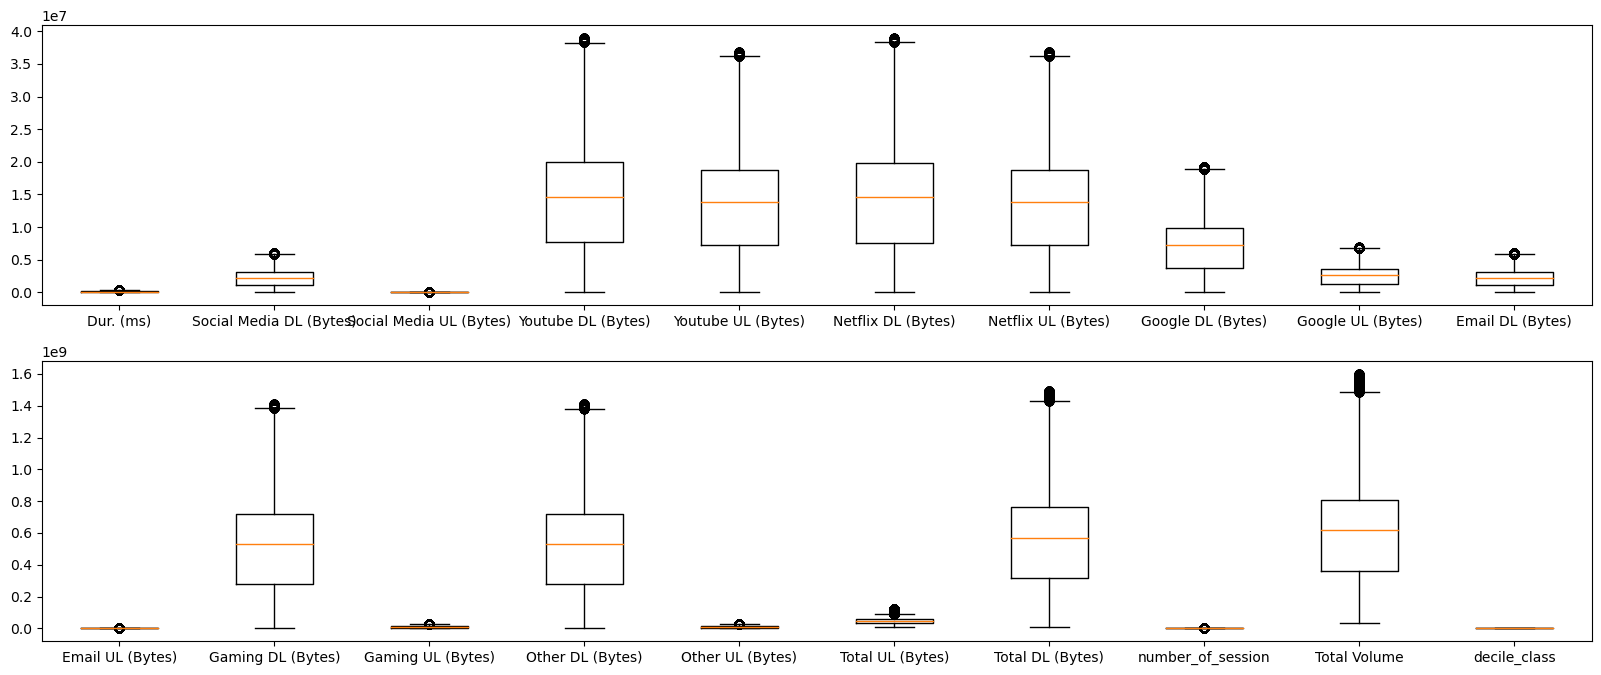

In [69]:
# graphical univariate analysis
graphical_univariate(user_behavior)

- It still shows outliers.

In [70]:
# fix outliers again
numerical_columns = user_behavior.select_dtypes(include=np.number).columns

for num_col in numerical_columns:
    user_behavior[num_col] = fix_outlier(user_behavior,num_col)

### Recheck Outliers

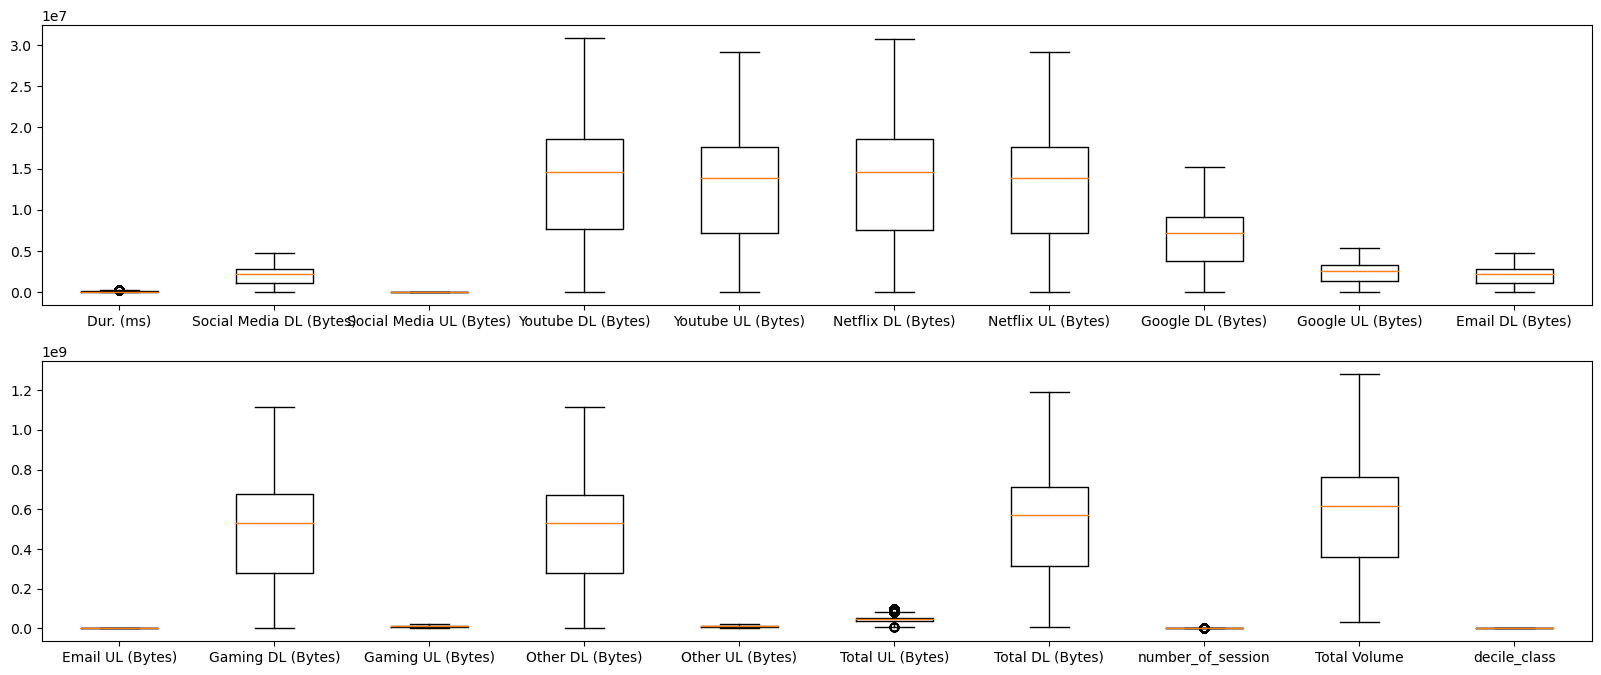

In [71]:
# graphical univariate analysis
graphical_univariate(user_behavior)

In [72]:
# calculate the basic and dispersion metric after outliers removed
basic_df = metric_of_attributes(user_behavior)
dispersion_df = dispersion_of_attributes(user_behavior)

# merge to create one dataframe
users_stats = pd.merge(basic_df, dispersion_df, on = 'Application')
users_stats

,Application,Maximum,Minimum,Mean,Median,Above_Mean_Users,Below_Mean_Users,Range,Varience,IQR,Standard dev
0,Dur. (ms),2.755870e+05,7.142000e+03,1.086326e+05,1.027142e+05,40254,66568,2.684450e+05,3.713107e+09,7.633850e+04,6.093527e+04
1,Social Media DL (Bytes),4.750516e+06,1.200000e+01,2.062944e+06,2.264782e+06,58558,48264,4.750504e+06,1.216858e+12,1.702328e+06,1.103113e+06
2,Social Media UL (Bytes),8.740500e+04,0.000000e+00,3.780463e+04,4.155612e+04,58570,48252,8.740500e+04,4.109872e+08,3.111200e+04,2.027282e+04
3,Youtube DL (Bytes),3.086262e+07,5.300000e+01,1.333259e+07,1.460313e+07,58488,48334,3.086256e+07,5.083273e+13,1.095744e+07,7.129708e+06
4,Youtube UL (Bytes),2.909040e+07,1.060000e+02,1.263974e+07,1.386518e+07,58608,48214,2.909030e+07,4.537581e+13,1.037011e+07,6.736157e+06
5,Netflix DL (Bytes),3.077619e+07,4.200000e+01,1.333102e+07,1.463868e+07,58608,48214,3.077615e+07,5.115113e+13,1.101919e+07,7.152002e+06
6,Netflix UL (Bytes),2.915052e+07,3.500000e+01,1.262962e+07,1.387703e+07,58623,48199,2.915048e+07,4.582046e+13,1.039215e+07,6.769081e+06
7,Google DL (Bytes),1.516370e+07,2.070000e+02,6.602210e+06,7.256168e+06,58623,48199,1.516349e+07,1.234320e+13,5.378440e+06,3.513289e+06
8,Google UL (Bytes),5.426677e+06,3.000000e+00,2.359792e+06,2.593073e+06,58582,48240,5.426674e+06,1.596170e+12,1.952525e+06,1.263396e+06
9,Email DL (Bytes),4.723512e+06,9.700000e+01,2.055955e+06,2.266133e+06,58767,48055,4.723415e+06,1.201151e+12,1.674483e+06,1.095970e+06


- After removing outliers it can be seen there are more customers that uses the applications more than the average number but the session duration is below the average users.

- Looking at the Total DL and Total UL it can be seen most customers spend their session more downloading files than uploading.
 
- The below mean users in number of session is larger than the above these most customers aren't frequent users of these service.

In [73]:
# create a new date frame with the sum of the DL and UL of each applications 
bivariate_dataframe = create_dataframe_for_bivariate(user_behavior)
bivariate_dataframe

,Social Media,Youtube,Netflix,Google,Email,Gaming,Other,Total DL/UL,Dur. (ms),Total Volume
0,2232135.0,21624548.0,27180981.00,4389005.0,1331362.00,812458661.0,3.865709e+08,8.786906e+08,116720.0,8.786906e+08
1,2660565.0,12432223.0,11221763.00,5334863.0,3307781.00,119750078.0,2.817101e+08,1.568596e+08,181230.0,1.568596e+08
2,3195623.0,21333570.0,19353900.00,3443126.0,3205380.00,538827713.0,5.016937e+08,5.959665e+08,134969.0,5.959665e+08
3,280294.0,6977321.0,1942092.00,9678493.0,2284670.00,391126127.0,3.527970e+07,4.223207e+08,49878.0,4.223207e+08
4,2912542.0,24205166.5,49201724.00,18499616.0,3305469.00,538310133.5,7.880193e+08,6.646407e+08,37104.0,6.179058e+08
...,...,...,...,...,...,...,...,...,...,...
106817,2486946.0,28947763.0,24293718.00,5990586.0,3984626.00,638609868.0,7.120621e+08,7.102876e+08,157069.0,7.102876e+08
106818,1413370.0,28226479.0,30370302.00,9892882.0,3396607.00,134815919.0,4.081072e+08,2.081231e+08,160461.0,2.081231e+08
106819,4250312.0,38012812.0,35760449.25,10246473.0,2830917.25,972344996.0,1.075140e+09,1.094693e+09,210389.0,1.094693e+09
106820,300183.0,26647843.0,14902538.00,7531269.0,1006915.00,660361359.0,2.952828e+08,7.146416e+08,8810.0,7.146416e+08


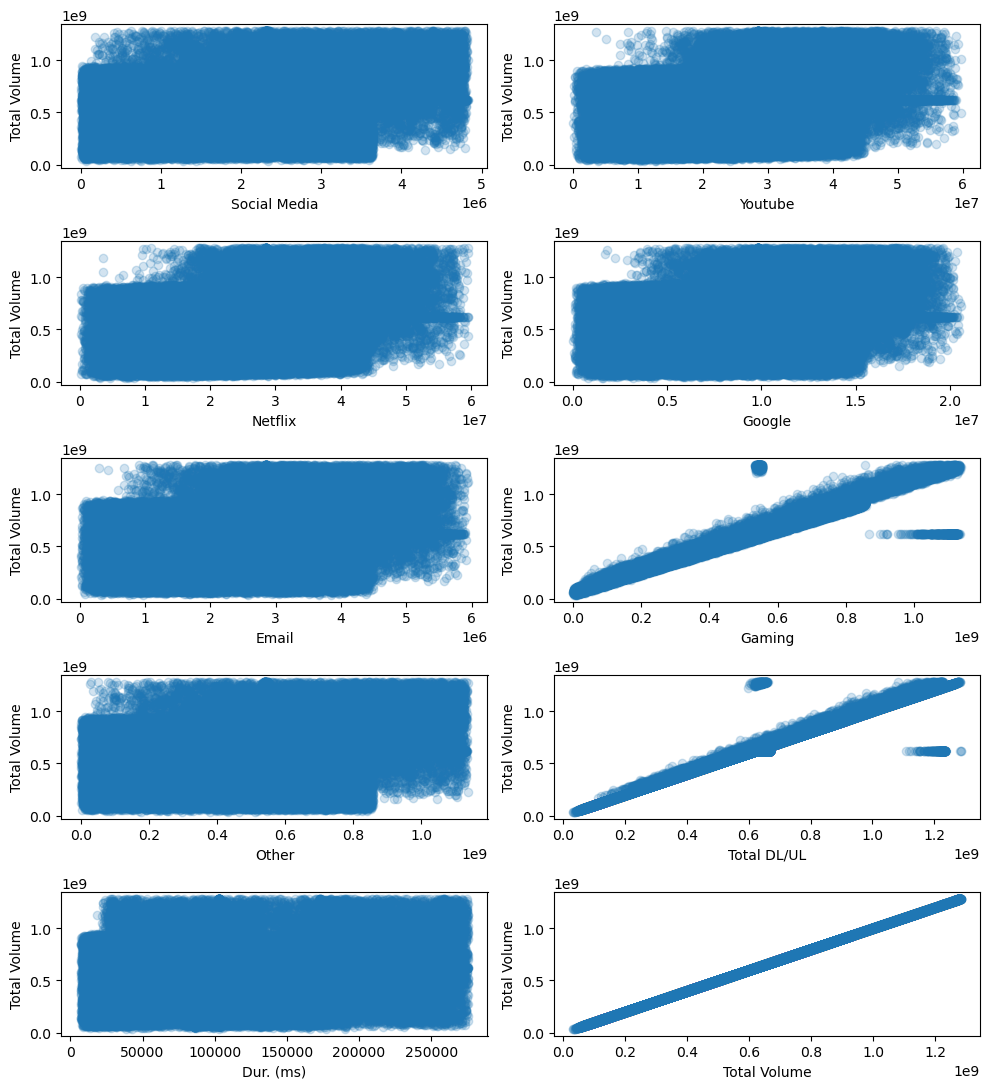

In [74]:
# scatter plot against total volume
scatter_bivariate(bivariate_dataframe)

In [75]:
# Compute the correlation matrix
correlation_matrix = bivariate_dataframe.corr()
correlation_matrix['Total Volume'].sort_values(ascending = False)

Total Volume    1.000000
Total DL/UL     0.988242
Gaming          0.976278
Netflix         0.264924
Youtube         0.263047
Google          0.238207
Email           0.220666
Social Media    0.193871
Other           0.187951
Dur. (ms)       0.147451
Name: Total Volume, dtype: float64

- Gaming application has a strong correlation with the Total volume, this can give us an insight that most of the users are either gamers or game developers. It can be concluded gaming applications are the primary driver for data consumption.

- The duration of usage has a minor impact on the total volume, indicating that longer durations don’t necessarily translate to significantly more data usage.

- Other variables like Netflix, YouTube, and Google contribute to the total volume, but the impact is less significant. 

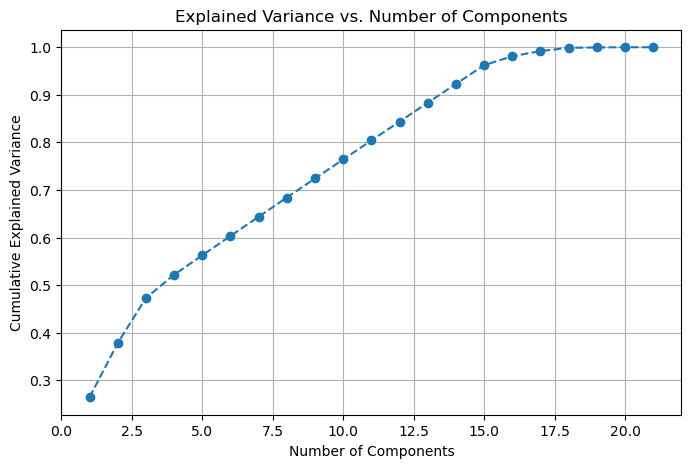

In [76]:
# dimension reduction
numerical_columns = user_behavior.select_dtypes(include=np.number).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_behavior[numerical_columns])

# use instantiate PCS then fit the dataset
pca = PCA()
pca_components = pca.fit(scaled_data)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# plot PCA to find the optimization value for n_components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

> From the above graph after 15 components their is a slight increase and after 17.5 it becomes constant thus n_components 16, can be used.

In [77]:
# reducing the dimenstions
pca = PCA(n_components=15)
pca_components = pca.fit_transform(scaled_data)
explained = np.cumsum(pca.explained_variance_ratio_)

print(f"Reducing the dimensionality by 15, {round(pca.explained_variance_ratio_.sum() * 100,2)}% of the data variance is captured.")

loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(15)])
loadings_df

Reducing the dimensionality by 15, 96.23% of the data variance is captured.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Dur. (ms),0.207866,0.485847,-0.282944,-0.041567,0.000727,-0.001959,-0.001927,-0.001239,-0.000019,-0.000723,0.000417,-0.000568,-0.003452,0.001915,-0.001610
Social Media DL (Bytes),0.173029,0.001810,0.119138,0.230722,-0.328310,-0.004581,0.249703,-0.129523,-0.177826,-0.507241,-0.034880,-0.262813,0.466285,0.355254,-0.029816
Social Media UL (Bytes),0.173581,0.002844,0.119004,0.234305,0.322431,0.017502,0.101116,-0.437634,-0.154430,-0.095077,0.162490,-0.258766,0.030510,-0.674150,-0.024546
Youtube DL (Bytes),0.172190,-0.001737,0.109586,0.248441,0.168375,0.133498,-0.301704,0.528434,-0.011188,0.306105,-0.217084,-0.518672,0.213028,-0.016264,-0.110564
Youtube UL (Bytes),0.189542,0.001830,0.184619,-0.380497,0.141290,0.324766,-0.169513,-0.031523,0.222354,-0.142381,-0.267095,0.336940,0.464063,-0.168659,0.102273
Netflix DL (Bytes),0.173209,-0.007781,0.113329,0.219423,0.288868,-0.168350,0.157679,-0.144402,0.640463,-0.171756,-0.364007,-0.041155,-0.310977,0.207146,-0.161699
Netflix UL (Bytes),0.190478,-0.000699,0.191907,-0.348935,-0.066381,-0.290675,-0.373875,0.143708,-0.155805,-0.402007,0.171794,-0.195794,-0.382369,-0.009539,-0.173213
Google DL (Bytes),0.173460,-0.001633,0.115025,0.238405,0.092541,0.084373,-0.375806,-0.168733,0.287291,0.119657,0.672595,0.091621,0.102247,0.307698,0.197693
Google UL (Bytes),0.174720,0.002049,0.129492,0.156700,0.101946,0.470053,-0.093102,-0.250662,-0.477112,0.137160,-0.189778,0.232840,-0.311370,0.302842,-0.286813
Email DL (Bytes),0.170276,0.002233,0.116729,0.276393,-0.338510,-0.291708,-0.293316,-0.127582,-0.116331,0.105014,-0.381989,0.141223,-0.128701,-0.114224,0.589602


- For PC1, the features related to total uploads, downloads, and the number of sessions are the primary drivers of variance, suggesting that the total volume of data uploaded/downloaded and the number of sessions are the most influential factors driving the variance in the data.

- For PC2, duration of sessions is a key factor. It may capture variance related to the duration of sessions and a contrasting relationship with gaming and data download.

- PC3 - PC8 These components capture progressively less variance, but they still highlight interesting patterns. For example, "Netflix UL (Bytes)" has a high loading on PC3, which might indicate variance associated with Netflix upload traffic. PC4 has high positive loadings for "Social Media DL (Bytes)" and negative loadings for "Youtube UL (Bytes), which could indicate a contrast between social media and video usage patterns.

- In conclusion the number of sessions, total upload volume, and total download volume are essential features for the overall variance in the data (particularly for PC1).